### Create FEA Keyword Files

In [1]:
import os
import itertools
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import ntpath # Equivalent of R's base (remove path)
import glob as gb

# Define the output file path
# Write to Google drive so that files are shared with desktop with Flexcom license
fo_p = '/Volumes/GoogleDrive-117010183998677742603/My Drive/_temp/flex/'

### Method 1: Generate Analysis Cases using Load Case Permutations (Not Default)

In [2]:
# Define load case options
slug_den = {'sd1':500, 'sd2':600, 'sd3':700, 'sd4':800, 'sd5':900} #1
slug_len = {'sl1':10, 'sl2':20, 'sl3':30, 'sl4':40, 'sl5':50} #2
pock_den = {'pd1':100, 'pd2':200, 'pd3':300, 'pd4':400, 'pd5':500} #3
pock_len = {'pl1':10, 'pl2':20, 'pl3':30, 'pl4':40, 'pl5':50} #4
slug_vel = {'sv1':4, 'sv2':6, 'sv3':8, 'sv4':10, 'sv5':12} #5
base_per = {'bp1':6, 'bp2':8, 'bp3':10, 'bp4':12, 'bp5':14} #6
base_amp = {'ba1':100, 'ba2':200, 'ba3':250, 'ba4':300, 'ba5':350} #7

In [3]:
lc = '00001_sd1_sl1_pd1_pl1_sv1_bp1_ba1.keyxm'
lc_slug_den = slug_den.get(lc[6:9])
lc_slug_len = slug_len.get(lc[10:13])
lc_pock_den = pock_den.get(lc[14:17])
lc_pock_len = pock_len.get(lc[18:21])
lc_slug_vel = slug_vel.get(lc[22:25])
lc_base_per = base_per.get(lc[26:29])
lc_base_amp = base_amp.get(lc[30:33])
lc_base_amp

100

In [4]:
# Create load case permutations
c = 1
load_cases = []
print(f'Total cases: {pow(5, 7)}')
for r in itertools.product(list(slug_den.keys()), list(slug_len.keys()), list(pock_den.keys()), list(pock_len.keys()), list(slug_vel.keys()), list(base_per.keys()), list(base_amp.keys())): 
    lc = f'{c:05d}_{r[0]}_{r[1]}_{r[2]}_{r[3]}_{r[4]}_{r[5]}_{r[6]}.keyxm'
    load_cases.append(lc)
    print(lc)
    c += 1

Total cases: 78125
00001_sd1_sl1_pd1_pl1_sv1_bp1_ba1.keyxm
00002_sd1_sl1_pd1_pl1_sv1_bp1_ba2.keyxm
00003_sd1_sl1_pd1_pl1_sv1_bp1_ba3.keyxm
00004_sd1_sl1_pd1_pl1_sv1_bp1_ba4.keyxm
00005_sd1_sl1_pd1_pl1_sv1_bp1_ba5.keyxm
00006_sd1_sl1_pd1_pl1_sv1_bp2_ba1.keyxm
00007_sd1_sl1_pd1_pl1_sv1_bp2_ba2.keyxm
00008_sd1_sl1_pd1_pl1_sv1_bp2_ba3.keyxm
00009_sd1_sl1_pd1_pl1_sv1_bp2_ba4.keyxm
00010_sd1_sl1_pd1_pl1_sv1_bp2_ba5.keyxm
00011_sd1_sl1_pd1_pl1_sv1_bp3_ba1.keyxm
00012_sd1_sl1_pd1_pl1_sv1_bp3_ba2.keyxm
00013_sd1_sl1_pd1_pl1_sv1_bp3_ba3.keyxm
00014_sd1_sl1_pd1_pl1_sv1_bp3_ba4.keyxm
00015_sd1_sl1_pd1_pl1_sv1_bp3_ba5.keyxm
00016_sd1_sl1_pd1_pl1_sv1_bp4_ba1.keyxm
00017_sd1_sl1_pd1_pl1_sv1_bp4_ba2.keyxm
00018_sd1_sl1_pd1_pl1_sv1_bp4_ba3.keyxm
00019_sd1_sl1_pd1_pl1_sv1_bp4_ba4.keyxm
00020_sd1_sl1_pd1_pl1_sv1_bp4_ba5.keyxm
00021_sd1_sl1_pd1_pl1_sv1_bp5_ba1.keyxm
00022_sd1_sl1_pd1_pl1_sv1_bp5_ba2.keyxm
00023_sd1_sl1_pd1_pl1_sv1_bp5_ba3.keyxm
00024_sd1_sl1_pd1_pl1_sv1_bp5_ba4.keyxm
00025_sd1_sl1_pd1_pl1

02963_sd1_sl1_pd5_pl4_sv4_bp3_ba3.keyxm
02964_sd1_sl1_pd5_pl4_sv4_bp3_ba4.keyxm
02965_sd1_sl1_pd5_pl4_sv4_bp3_ba5.keyxm
02966_sd1_sl1_pd5_pl4_sv4_bp4_ba1.keyxm
02967_sd1_sl1_pd5_pl4_sv4_bp4_ba2.keyxm
02968_sd1_sl1_pd5_pl4_sv4_bp4_ba3.keyxm
02969_sd1_sl1_pd5_pl4_sv4_bp4_ba4.keyxm
02970_sd1_sl1_pd5_pl4_sv4_bp4_ba5.keyxm
02971_sd1_sl1_pd5_pl4_sv4_bp5_ba1.keyxm
02972_sd1_sl1_pd5_pl4_sv4_bp5_ba2.keyxm
02973_sd1_sl1_pd5_pl4_sv4_bp5_ba3.keyxm
02974_sd1_sl1_pd5_pl4_sv4_bp5_ba4.keyxm
02975_sd1_sl1_pd5_pl4_sv4_bp5_ba5.keyxm
02976_sd1_sl1_pd5_pl4_sv5_bp1_ba1.keyxm
02977_sd1_sl1_pd5_pl4_sv5_bp1_ba2.keyxm
02978_sd1_sl1_pd5_pl4_sv5_bp1_ba3.keyxm
02979_sd1_sl1_pd5_pl4_sv5_bp1_ba4.keyxm
02980_sd1_sl1_pd5_pl4_sv5_bp1_ba5.keyxm
02981_sd1_sl1_pd5_pl4_sv5_bp2_ba1.keyxm
02982_sd1_sl1_pd5_pl4_sv5_bp2_ba2.keyxm
02983_sd1_sl1_pd5_pl4_sv5_bp2_ba3.keyxm
02984_sd1_sl1_pd5_pl4_sv5_bp2_ba4.keyxm
02985_sd1_sl1_pd5_pl4_sv5_bp2_ba5.keyxm
02986_sd1_sl1_pd5_pl4_sv5_bp3_ba1.keyxm
02987_sd1_sl1_pd5_pl4_sv5_bp3_ba2.keyxm


05705_sd1_sl2_pd5_pl1_sv4_bp1_ba5.keyxm
05706_sd1_sl2_pd5_pl1_sv4_bp2_ba1.keyxm
05707_sd1_sl2_pd5_pl1_sv4_bp2_ba2.keyxm
05708_sd1_sl2_pd5_pl1_sv4_bp2_ba3.keyxm
05709_sd1_sl2_pd5_pl1_sv4_bp2_ba4.keyxm
05710_sd1_sl2_pd5_pl1_sv4_bp2_ba5.keyxm
05711_sd1_sl2_pd5_pl1_sv4_bp3_ba1.keyxm
05712_sd1_sl2_pd5_pl1_sv4_bp3_ba2.keyxm
05713_sd1_sl2_pd5_pl1_sv4_bp3_ba3.keyxm
05714_sd1_sl2_pd5_pl1_sv4_bp3_ba4.keyxm
05715_sd1_sl2_pd5_pl1_sv4_bp3_ba5.keyxm
05716_sd1_sl2_pd5_pl1_sv4_bp4_ba1.keyxm
05717_sd1_sl2_pd5_pl1_sv4_bp4_ba2.keyxm
05718_sd1_sl2_pd5_pl1_sv4_bp4_ba3.keyxm
05719_sd1_sl2_pd5_pl1_sv4_bp4_ba4.keyxm
05720_sd1_sl2_pd5_pl1_sv4_bp4_ba5.keyxm
05721_sd1_sl2_pd5_pl1_sv4_bp5_ba1.keyxm
05722_sd1_sl2_pd5_pl1_sv4_bp5_ba2.keyxm
05723_sd1_sl2_pd5_pl1_sv4_bp5_ba3.keyxm
05724_sd1_sl2_pd5_pl1_sv4_bp5_ba4.keyxm
05725_sd1_sl2_pd5_pl1_sv4_bp5_ba5.keyxm
05726_sd1_sl2_pd5_pl1_sv5_bp1_ba1.keyxm
05727_sd1_sl2_pd5_pl1_sv5_bp1_ba2.keyxm
05728_sd1_sl2_pd5_pl1_sv5_bp1_ba3.keyxm
05729_sd1_sl2_pd5_pl1_sv5_bp1_ba4.keyxm


08462_sd1_sl3_pd4_pl3_sv4_bp3_ba2.keyxm
08463_sd1_sl3_pd4_pl3_sv4_bp3_ba3.keyxm
08464_sd1_sl3_pd4_pl3_sv4_bp3_ba4.keyxm
08465_sd1_sl3_pd4_pl3_sv4_bp3_ba5.keyxm
08466_sd1_sl3_pd4_pl3_sv4_bp4_ba1.keyxm
08467_sd1_sl3_pd4_pl3_sv4_bp4_ba2.keyxm
08468_sd1_sl3_pd4_pl3_sv4_bp4_ba3.keyxm
08469_sd1_sl3_pd4_pl3_sv4_bp4_ba4.keyxm
08470_sd1_sl3_pd4_pl3_sv4_bp4_ba5.keyxm
08471_sd1_sl3_pd4_pl3_sv4_bp5_ba1.keyxm
08472_sd1_sl3_pd4_pl3_sv4_bp5_ba2.keyxm
08473_sd1_sl3_pd4_pl3_sv4_bp5_ba3.keyxm
08474_sd1_sl3_pd4_pl3_sv4_bp5_ba4.keyxm
08475_sd1_sl3_pd4_pl3_sv4_bp5_ba5.keyxm
08476_sd1_sl3_pd4_pl3_sv5_bp1_ba1.keyxm
08477_sd1_sl3_pd4_pl3_sv5_bp1_ba2.keyxm
08478_sd1_sl3_pd4_pl3_sv5_bp1_ba3.keyxm
08479_sd1_sl3_pd4_pl3_sv5_bp1_ba4.keyxm
08480_sd1_sl3_pd4_pl3_sv5_bp1_ba5.keyxm
08481_sd1_sl3_pd4_pl3_sv5_bp2_ba1.keyxm
08482_sd1_sl3_pd4_pl3_sv5_bp2_ba2.keyxm
08483_sd1_sl3_pd4_pl3_sv5_bp2_ba3.keyxm
08484_sd1_sl3_pd4_pl3_sv5_bp2_ba4.keyxm
08485_sd1_sl3_pd4_pl3_sv5_bp2_ba5.keyxm
08486_sd1_sl3_pd4_pl3_sv5_bp3_ba1.keyxm


11462_sd1_sl4_pd4_pl2_sv4_bp3_ba2.keyxm
11463_sd1_sl4_pd4_pl2_sv4_bp3_ba3.keyxm
11464_sd1_sl4_pd4_pl2_sv4_bp3_ba4.keyxm
11465_sd1_sl4_pd4_pl2_sv4_bp3_ba5.keyxm
11466_sd1_sl4_pd4_pl2_sv4_bp4_ba1.keyxm
11467_sd1_sl4_pd4_pl2_sv4_bp4_ba2.keyxm
11468_sd1_sl4_pd4_pl2_sv4_bp4_ba3.keyxm
11469_sd1_sl4_pd4_pl2_sv4_bp4_ba4.keyxm
11470_sd1_sl4_pd4_pl2_sv4_bp4_ba5.keyxm
11471_sd1_sl4_pd4_pl2_sv4_bp5_ba1.keyxm
11472_sd1_sl4_pd4_pl2_sv4_bp5_ba2.keyxm
11473_sd1_sl4_pd4_pl2_sv4_bp5_ba3.keyxm
11474_sd1_sl4_pd4_pl2_sv4_bp5_ba4.keyxm
11475_sd1_sl4_pd4_pl2_sv4_bp5_ba5.keyxm
11476_sd1_sl4_pd4_pl2_sv5_bp1_ba1.keyxm
11477_sd1_sl4_pd4_pl2_sv5_bp1_ba2.keyxm
11478_sd1_sl4_pd4_pl2_sv5_bp1_ba3.keyxm
11479_sd1_sl4_pd4_pl2_sv5_bp1_ba4.keyxm
11480_sd1_sl4_pd4_pl2_sv5_bp1_ba5.keyxm
11481_sd1_sl4_pd4_pl2_sv5_bp2_ba1.keyxm
11482_sd1_sl4_pd4_pl2_sv5_bp2_ba2.keyxm
11483_sd1_sl4_pd4_pl2_sv5_bp2_ba3.keyxm
11484_sd1_sl4_pd4_pl2_sv5_bp2_ba4.keyxm
11485_sd1_sl4_pd4_pl2_sv5_bp2_ba5.keyxm
11486_sd1_sl4_pd4_pl2_sv5_bp3_ba1.keyxm


14461_sd1_sl5_pd4_pl1_sv4_bp3_ba1.keyxm
14462_sd1_sl5_pd4_pl1_sv4_bp3_ba2.keyxm
14463_sd1_sl5_pd4_pl1_sv4_bp3_ba3.keyxm
14464_sd1_sl5_pd4_pl1_sv4_bp3_ba4.keyxm
14465_sd1_sl5_pd4_pl1_sv4_bp3_ba5.keyxm
14466_sd1_sl5_pd4_pl1_sv4_bp4_ba1.keyxm
14467_sd1_sl5_pd4_pl1_sv4_bp4_ba2.keyxm
14468_sd1_sl5_pd4_pl1_sv4_bp4_ba3.keyxm
14469_sd1_sl5_pd4_pl1_sv4_bp4_ba4.keyxm
14470_sd1_sl5_pd4_pl1_sv4_bp4_ba5.keyxm
14471_sd1_sl5_pd4_pl1_sv4_bp5_ba1.keyxm
14472_sd1_sl5_pd4_pl1_sv4_bp5_ba2.keyxm
14473_sd1_sl5_pd4_pl1_sv4_bp5_ba3.keyxm
14474_sd1_sl5_pd4_pl1_sv4_bp5_ba4.keyxm
14475_sd1_sl5_pd4_pl1_sv4_bp5_ba5.keyxm
14476_sd1_sl5_pd4_pl1_sv5_bp1_ba1.keyxm
14477_sd1_sl5_pd4_pl1_sv5_bp1_ba2.keyxm
14478_sd1_sl5_pd4_pl1_sv5_bp1_ba3.keyxm
14479_sd1_sl5_pd4_pl1_sv5_bp1_ba4.keyxm
14480_sd1_sl5_pd4_pl1_sv5_bp1_ba5.keyxm
14481_sd1_sl5_pd4_pl1_sv5_bp2_ba1.keyxm
14482_sd1_sl5_pd4_pl1_sv5_bp2_ba2.keyxm
14483_sd1_sl5_pd4_pl1_sv5_bp2_ba3.keyxm
14484_sd1_sl5_pd4_pl1_sv5_bp2_ba4.keyxm
14485_sd1_sl5_pd4_pl1_sv5_bp2_ba5.keyxm


17461_sd2_sl1_pd3_pl5_sv4_bp3_ba1.keyxm
17462_sd2_sl1_pd3_pl5_sv4_bp3_ba2.keyxm
17463_sd2_sl1_pd3_pl5_sv4_bp3_ba3.keyxm
17464_sd2_sl1_pd3_pl5_sv4_bp3_ba4.keyxm
17465_sd2_sl1_pd3_pl5_sv4_bp3_ba5.keyxm
17466_sd2_sl1_pd3_pl5_sv4_bp4_ba1.keyxm
17467_sd2_sl1_pd3_pl5_sv4_bp4_ba2.keyxm
17468_sd2_sl1_pd3_pl5_sv4_bp4_ba3.keyxm
17469_sd2_sl1_pd3_pl5_sv4_bp4_ba4.keyxm
17470_sd2_sl1_pd3_pl5_sv4_bp4_ba5.keyxm
17471_sd2_sl1_pd3_pl5_sv4_bp5_ba1.keyxm
17472_sd2_sl1_pd3_pl5_sv4_bp5_ba2.keyxm
17473_sd2_sl1_pd3_pl5_sv4_bp5_ba3.keyxm
17474_sd2_sl1_pd3_pl5_sv4_bp5_ba4.keyxm
17475_sd2_sl1_pd3_pl5_sv4_bp5_ba5.keyxm
17476_sd2_sl1_pd3_pl5_sv5_bp1_ba1.keyxm
17477_sd2_sl1_pd3_pl5_sv5_bp1_ba2.keyxm
17478_sd2_sl1_pd3_pl5_sv5_bp1_ba3.keyxm
17479_sd2_sl1_pd3_pl5_sv5_bp1_ba4.keyxm
17480_sd2_sl1_pd3_pl5_sv5_bp1_ba5.keyxm
17481_sd2_sl1_pd3_pl5_sv5_bp2_ba1.keyxm
17482_sd2_sl1_pd3_pl5_sv5_bp2_ba2.keyxm
17483_sd2_sl1_pd3_pl5_sv5_bp2_ba3.keyxm
17484_sd2_sl1_pd3_pl5_sv5_bp2_ba4.keyxm
17485_sd2_sl1_pd3_pl5_sv5_bp2_ba5.keyxm


20460_sd2_sl2_pd3_pl4_sv4_bp2_ba5.keyxm
20461_sd2_sl2_pd3_pl4_sv4_bp3_ba1.keyxm
20462_sd2_sl2_pd3_pl4_sv4_bp3_ba2.keyxm
20463_sd2_sl2_pd3_pl4_sv4_bp3_ba3.keyxm
20464_sd2_sl2_pd3_pl4_sv4_bp3_ba4.keyxm
20465_sd2_sl2_pd3_pl4_sv4_bp3_ba5.keyxm
20466_sd2_sl2_pd3_pl4_sv4_bp4_ba1.keyxm
20467_sd2_sl2_pd3_pl4_sv4_bp4_ba2.keyxm
20468_sd2_sl2_pd3_pl4_sv4_bp4_ba3.keyxm
20469_sd2_sl2_pd3_pl4_sv4_bp4_ba4.keyxm
20470_sd2_sl2_pd3_pl4_sv4_bp4_ba5.keyxm
20471_sd2_sl2_pd3_pl4_sv4_bp5_ba1.keyxm
20472_sd2_sl2_pd3_pl4_sv4_bp5_ba2.keyxm
20473_sd2_sl2_pd3_pl4_sv4_bp5_ba3.keyxm
20474_sd2_sl2_pd3_pl4_sv4_bp5_ba4.keyxm
20475_sd2_sl2_pd3_pl4_sv4_bp5_ba5.keyxm
20476_sd2_sl2_pd3_pl4_sv5_bp1_ba1.keyxm
20477_sd2_sl2_pd3_pl4_sv5_bp1_ba2.keyxm
20478_sd2_sl2_pd3_pl4_sv5_bp1_ba3.keyxm
20479_sd2_sl2_pd3_pl4_sv5_bp1_ba4.keyxm
20480_sd2_sl2_pd3_pl4_sv5_bp1_ba5.keyxm
20481_sd2_sl2_pd3_pl4_sv5_bp2_ba1.keyxm
20482_sd2_sl2_pd3_pl4_sv5_bp2_ba2.keyxm
20483_sd2_sl2_pd3_pl4_sv5_bp2_ba3.keyxm
20484_sd2_sl2_pd3_pl4_sv5_bp2_ba4.keyxm


23960_sd2_sl3_pd4_pl2_sv4_bp2_ba5.keyxm
23961_sd2_sl3_pd4_pl2_sv4_bp3_ba1.keyxm
23962_sd2_sl3_pd4_pl2_sv4_bp3_ba2.keyxm
23963_sd2_sl3_pd4_pl2_sv4_bp3_ba3.keyxm
23964_sd2_sl3_pd4_pl2_sv4_bp3_ba4.keyxm
23965_sd2_sl3_pd4_pl2_sv4_bp3_ba5.keyxm
23966_sd2_sl3_pd4_pl2_sv4_bp4_ba1.keyxm
23967_sd2_sl3_pd4_pl2_sv4_bp4_ba2.keyxm
23968_sd2_sl3_pd4_pl2_sv4_bp4_ba3.keyxm
23969_sd2_sl3_pd4_pl2_sv4_bp4_ba4.keyxm
23970_sd2_sl3_pd4_pl2_sv4_bp4_ba5.keyxm
23971_sd2_sl3_pd4_pl2_sv4_bp5_ba1.keyxm
23972_sd2_sl3_pd4_pl2_sv4_bp5_ba2.keyxm
23973_sd2_sl3_pd4_pl2_sv4_bp5_ba3.keyxm
23974_sd2_sl3_pd4_pl2_sv4_bp5_ba4.keyxm
23975_sd2_sl3_pd4_pl2_sv4_bp5_ba5.keyxm
23976_sd2_sl3_pd4_pl2_sv5_bp1_ba1.keyxm
23977_sd2_sl3_pd4_pl2_sv5_bp1_ba2.keyxm
23978_sd2_sl3_pd4_pl2_sv5_bp1_ba3.keyxm
23979_sd2_sl3_pd4_pl2_sv5_bp1_ba4.keyxm
23980_sd2_sl3_pd4_pl2_sv5_bp1_ba5.keyxm
23981_sd2_sl3_pd4_pl2_sv5_bp2_ba1.keyxm
23982_sd2_sl3_pd4_pl2_sv5_bp2_ba2.keyxm
23983_sd2_sl3_pd4_pl2_sv5_bp2_ba3.keyxm
23984_sd2_sl3_pd4_pl2_sv5_bp2_ba4.keyxm


27244_sd2_sl4_pd4_pl3_sv5_bp4_ba4.keyxm
27245_sd2_sl4_pd4_pl3_sv5_bp4_ba5.keyxm
27246_sd2_sl4_pd4_pl3_sv5_bp5_ba1.keyxm
27247_sd2_sl4_pd4_pl3_sv5_bp5_ba2.keyxm
27248_sd2_sl4_pd4_pl3_sv5_bp5_ba3.keyxm
27249_sd2_sl4_pd4_pl3_sv5_bp5_ba4.keyxm
27250_sd2_sl4_pd4_pl3_sv5_bp5_ba5.keyxm
27251_sd2_sl4_pd4_pl4_sv1_bp1_ba1.keyxm
27252_sd2_sl4_pd4_pl4_sv1_bp1_ba2.keyxm
27253_sd2_sl4_pd4_pl4_sv1_bp1_ba3.keyxm
27254_sd2_sl4_pd4_pl4_sv1_bp1_ba4.keyxm
27255_sd2_sl4_pd4_pl4_sv1_bp1_ba5.keyxm
27256_sd2_sl4_pd4_pl4_sv1_bp2_ba1.keyxm
27257_sd2_sl4_pd4_pl4_sv1_bp2_ba2.keyxm
27258_sd2_sl4_pd4_pl4_sv1_bp2_ba3.keyxm
27259_sd2_sl4_pd4_pl4_sv1_bp2_ba4.keyxm
27260_sd2_sl4_pd4_pl4_sv1_bp2_ba5.keyxm
27261_sd2_sl4_pd4_pl4_sv1_bp3_ba1.keyxm
27262_sd2_sl4_pd4_pl4_sv1_bp3_ba2.keyxm
27263_sd2_sl4_pd4_pl4_sv1_bp3_ba3.keyxm
27264_sd2_sl4_pd4_pl4_sv1_bp3_ba4.keyxm
27265_sd2_sl4_pd4_pl4_sv1_bp3_ba5.keyxm
27266_sd2_sl4_pd4_pl4_sv1_bp4_ba1.keyxm
27267_sd2_sl4_pd4_pl4_sv1_bp4_ba2.keyxm
27268_sd2_sl4_pd4_pl4_sv1_bp4_ba3.keyxm


30459_sd2_sl5_pd4_pl4_sv4_bp2_ba4.keyxm
30460_sd2_sl5_pd4_pl4_sv4_bp2_ba5.keyxm
30461_sd2_sl5_pd4_pl4_sv4_bp3_ba1.keyxm
30462_sd2_sl5_pd4_pl4_sv4_bp3_ba2.keyxm
30463_sd2_sl5_pd4_pl4_sv4_bp3_ba3.keyxm
30464_sd2_sl5_pd4_pl4_sv4_bp3_ba4.keyxm
30465_sd2_sl5_pd4_pl4_sv4_bp3_ba5.keyxm
30466_sd2_sl5_pd4_pl4_sv4_bp4_ba1.keyxm
30467_sd2_sl5_pd4_pl4_sv4_bp4_ba2.keyxm
30468_sd2_sl5_pd4_pl4_sv4_bp4_ba3.keyxm
30469_sd2_sl5_pd4_pl4_sv4_bp4_ba4.keyxm
30470_sd2_sl5_pd4_pl4_sv4_bp4_ba5.keyxm
30471_sd2_sl5_pd4_pl4_sv4_bp5_ba1.keyxm
30472_sd2_sl5_pd4_pl4_sv4_bp5_ba2.keyxm
30473_sd2_sl5_pd4_pl4_sv4_bp5_ba3.keyxm
30474_sd2_sl5_pd4_pl4_sv4_bp5_ba4.keyxm
30475_sd2_sl5_pd4_pl4_sv4_bp5_ba5.keyxm
30476_sd2_sl5_pd4_pl4_sv5_bp1_ba1.keyxm
30477_sd2_sl5_pd4_pl4_sv5_bp1_ba2.keyxm
30478_sd2_sl5_pd4_pl4_sv5_bp1_ba3.keyxm
30479_sd2_sl5_pd4_pl4_sv5_bp1_ba4.keyxm
30480_sd2_sl5_pd4_pl4_sv5_bp1_ba5.keyxm
30481_sd2_sl5_pd4_pl4_sv5_bp2_ba1.keyxm
30482_sd2_sl5_pd4_pl4_sv5_bp2_ba2.keyxm
30483_sd2_sl5_pd4_pl4_sv5_bp2_ba3.keyxm


33742_sd3_sl1_pd4_pl5_sv5_bp4_ba2.keyxm
33743_sd3_sl1_pd4_pl5_sv5_bp4_ba3.keyxm
33744_sd3_sl1_pd4_pl5_sv5_bp4_ba4.keyxm
33745_sd3_sl1_pd4_pl5_sv5_bp4_ba5.keyxm
33746_sd3_sl1_pd4_pl5_sv5_bp5_ba1.keyxm
33747_sd3_sl1_pd4_pl5_sv5_bp5_ba2.keyxm
33748_sd3_sl1_pd4_pl5_sv5_bp5_ba3.keyxm
33749_sd3_sl1_pd4_pl5_sv5_bp5_ba4.keyxm
33750_sd3_sl1_pd4_pl5_sv5_bp5_ba5.keyxm
33751_sd3_sl1_pd5_pl1_sv1_bp1_ba1.keyxm
33752_sd3_sl1_pd5_pl1_sv1_bp1_ba2.keyxm
33753_sd3_sl1_pd5_pl1_sv1_bp1_ba3.keyxm
33754_sd3_sl1_pd5_pl1_sv1_bp1_ba4.keyxm
33755_sd3_sl1_pd5_pl1_sv1_bp1_ba5.keyxm
33756_sd3_sl1_pd5_pl1_sv1_bp2_ba1.keyxm
33757_sd3_sl1_pd5_pl1_sv1_bp2_ba2.keyxm
33758_sd3_sl1_pd5_pl1_sv1_bp2_ba3.keyxm
33759_sd3_sl1_pd5_pl1_sv1_bp2_ba4.keyxm
33760_sd3_sl1_pd5_pl1_sv1_bp2_ba5.keyxm
33761_sd3_sl1_pd5_pl1_sv1_bp3_ba1.keyxm
33762_sd3_sl1_pd5_pl1_sv1_bp3_ba2.keyxm
33763_sd3_sl1_pd5_pl1_sv1_bp3_ba3.keyxm
33764_sd3_sl1_pd5_pl1_sv1_bp3_ba4.keyxm
33765_sd3_sl1_pd5_pl1_sv1_bp3_ba5.keyxm
33766_sd3_sl1_pd5_pl1_sv1_bp4_ba1.keyxm


36958_sd3_sl2_pd5_pl1_sv4_bp2_ba3.keyxm
36959_sd3_sl2_pd5_pl1_sv4_bp2_ba4.keyxm
36960_sd3_sl2_pd5_pl1_sv4_bp2_ba5.keyxm
36961_sd3_sl2_pd5_pl1_sv4_bp3_ba1.keyxm
36962_sd3_sl2_pd5_pl1_sv4_bp3_ba2.keyxm
36963_sd3_sl2_pd5_pl1_sv4_bp3_ba3.keyxm
36964_sd3_sl2_pd5_pl1_sv4_bp3_ba4.keyxm
36965_sd3_sl2_pd5_pl1_sv4_bp3_ba5.keyxm
36966_sd3_sl2_pd5_pl1_sv4_bp4_ba1.keyxm
36967_sd3_sl2_pd5_pl1_sv4_bp4_ba2.keyxm
36968_sd3_sl2_pd5_pl1_sv4_bp4_ba3.keyxm
36969_sd3_sl2_pd5_pl1_sv4_bp4_ba4.keyxm
36970_sd3_sl2_pd5_pl1_sv4_bp4_ba5.keyxm
36971_sd3_sl2_pd5_pl1_sv4_bp5_ba1.keyxm
36972_sd3_sl2_pd5_pl1_sv4_bp5_ba2.keyxm
36973_sd3_sl2_pd5_pl1_sv4_bp5_ba3.keyxm
36974_sd3_sl2_pd5_pl1_sv4_bp5_ba4.keyxm
36975_sd3_sl2_pd5_pl1_sv4_bp5_ba5.keyxm
36976_sd3_sl2_pd5_pl1_sv5_bp1_ba1.keyxm
36977_sd3_sl2_pd5_pl1_sv5_bp1_ba2.keyxm
36978_sd3_sl2_pd5_pl1_sv5_bp1_ba3.keyxm
36979_sd3_sl2_pd5_pl1_sv5_bp1_ba4.keyxm
36980_sd3_sl2_pd5_pl1_sv5_bp1_ba5.keyxm
36981_sd3_sl2_pd5_pl1_sv5_bp2_ba1.keyxm
36982_sd3_sl2_pd5_pl1_sv5_bp2_ba2.keyxm


40457_sd3_sl3_pd5_pl4_sv4_bp2_ba2.keyxm
40458_sd3_sl3_pd5_pl4_sv4_bp2_ba3.keyxm
40459_sd3_sl3_pd5_pl4_sv4_bp2_ba4.keyxm
40460_sd3_sl3_pd5_pl4_sv4_bp2_ba5.keyxm
40461_sd3_sl3_pd5_pl4_sv4_bp3_ba1.keyxm
40462_sd3_sl3_pd5_pl4_sv4_bp3_ba2.keyxm
40463_sd3_sl3_pd5_pl4_sv4_bp3_ba3.keyxm
40464_sd3_sl3_pd5_pl4_sv4_bp3_ba4.keyxm
40465_sd3_sl3_pd5_pl4_sv4_bp3_ba5.keyxm
40466_sd3_sl3_pd5_pl4_sv4_bp4_ba1.keyxm
40467_sd3_sl3_pd5_pl4_sv4_bp4_ba2.keyxm
40468_sd3_sl3_pd5_pl4_sv4_bp4_ba3.keyxm
40469_sd3_sl3_pd5_pl4_sv4_bp4_ba4.keyxm
40470_sd3_sl3_pd5_pl4_sv4_bp4_ba5.keyxm
40471_sd3_sl3_pd5_pl4_sv4_bp5_ba1.keyxm
40472_sd3_sl3_pd5_pl4_sv4_bp5_ba2.keyxm
40473_sd3_sl3_pd5_pl4_sv4_bp5_ba3.keyxm
40474_sd3_sl3_pd5_pl4_sv4_bp5_ba4.keyxm
40475_sd3_sl3_pd5_pl4_sv4_bp5_ba5.keyxm
40476_sd3_sl3_pd5_pl4_sv5_bp1_ba1.keyxm
40477_sd3_sl3_pd5_pl4_sv5_bp1_ba2.keyxm
40478_sd3_sl3_pd5_pl4_sv5_bp1_ba3.keyxm
40479_sd3_sl3_pd5_pl4_sv5_bp1_ba4.keyxm
40480_sd3_sl3_pd5_pl4_sv5_bp1_ba5.keyxm
40481_sd3_sl3_pd5_pl4_sv5_bp2_ba1.keyxm


43457_sd3_sl4_pd5_pl3_sv4_bp2_ba2.keyxm
43458_sd3_sl4_pd5_pl3_sv4_bp2_ba3.keyxm
43459_sd3_sl4_pd5_pl3_sv4_bp2_ba4.keyxm
43460_sd3_sl4_pd5_pl3_sv4_bp2_ba5.keyxm
43461_sd3_sl4_pd5_pl3_sv4_bp3_ba1.keyxm
43462_sd3_sl4_pd5_pl3_sv4_bp3_ba2.keyxm
43463_sd3_sl4_pd5_pl3_sv4_bp3_ba3.keyxm
43464_sd3_sl4_pd5_pl3_sv4_bp3_ba4.keyxm
43465_sd3_sl4_pd5_pl3_sv4_bp3_ba5.keyxm
43466_sd3_sl4_pd5_pl3_sv4_bp4_ba1.keyxm
43467_sd3_sl4_pd5_pl3_sv4_bp4_ba2.keyxm
43468_sd3_sl4_pd5_pl3_sv4_bp4_ba3.keyxm
43469_sd3_sl4_pd5_pl3_sv4_bp4_ba4.keyxm
43470_sd3_sl4_pd5_pl3_sv4_bp4_ba5.keyxm
43471_sd3_sl4_pd5_pl3_sv4_bp5_ba1.keyxm
43472_sd3_sl4_pd5_pl3_sv4_bp5_ba2.keyxm
43473_sd3_sl4_pd5_pl3_sv4_bp5_ba3.keyxm
43474_sd3_sl4_pd5_pl3_sv4_bp5_ba4.keyxm
43475_sd3_sl4_pd5_pl3_sv4_bp5_ba5.keyxm
43476_sd3_sl4_pd5_pl3_sv5_bp1_ba1.keyxm
43477_sd3_sl4_pd5_pl3_sv5_bp1_ba2.keyxm
43478_sd3_sl4_pd5_pl3_sv5_bp1_ba3.keyxm
43479_sd3_sl4_pd5_pl3_sv5_bp1_ba4.keyxm
43480_sd3_sl4_pd5_pl3_sv5_bp1_ba5.keyxm
43481_sd3_sl4_pd5_pl3_sv5_bp2_ba1.keyxm


46456_sd3_sl5_pd5_pl2_sv4_bp2_ba1.keyxm
46457_sd3_sl5_pd5_pl2_sv4_bp2_ba2.keyxm
46458_sd3_sl5_pd5_pl2_sv4_bp2_ba3.keyxm
46459_sd3_sl5_pd5_pl2_sv4_bp2_ba4.keyxm
46460_sd3_sl5_pd5_pl2_sv4_bp2_ba5.keyxm
46461_sd3_sl5_pd5_pl2_sv4_bp3_ba1.keyxm
46462_sd3_sl5_pd5_pl2_sv4_bp3_ba2.keyxm
46463_sd3_sl5_pd5_pl2_sv4_bp3_ba3.keyxm
46464_sd3_sl5_pd5_pl2_sv4_bp3_ba4.keyxm
46465_sd3_sl5_pd5_pl2_sv4_bp3_ba5.keyxm
46466_sd3_sl5_pd5_pl2_sv4_bp4_ba1.keyxm
46467_sd3_sl5_pd5_pl2_sv4_bp4_ba2.keyxm
46468_sd3_sl5_pd5_pl2_sv4_bp4_ba3.keyxm
46469_sd3_sl5_pd5_pl2_sv4_bp4_ba4.keyxm
46470_sd3_sl5_pd5_pl2_sv4_bp4_ba5.keyxm
46471_sd3_sl5_pd5_pl2_sv4_bp5_ba1.keyxm
46472_sd3_sl5_pd5_pl2_sv4_bp5_ba2.keyxm
46473_sd3_sl5_pd5_pl2_sv4_bp5_ba3.keyxm
46474_sd3_sl5_pd5_pl2_sv4_bp5_ba4.keyxm
46475_sd3_sl5_pd5_pl2_sv4_bp5_ba5.keyxm
46476_sd3_sl5_pd5_pl2_sv5_bp1_ba1.keyxm
46477_sd3_sl5_pd5_pl2_sv5_bp1_ba2.keyxm
46478_sd3_sl5_pd5_pl2_sv5_bp1_ba3.keyxm
46479_sd3_sl5_pd5_pl2_sv5_bp1_ba4.keyxm
46480_sd3_sl5_pd5_pl2_sv5_bp1_ba5.keyxm


49456_sd4_sl1_pd5_pl1_sv4_bp2_ba1.keyxm
49457_sd4_sl1_pd5_pl1_sv4_bp2_ba2.keyxm
49458_sd4_sl1_pd5_pl1_sv4_bp2_ba3.keyxm
49459_sd4_sl1_pd5_pl1_sv4_bp2_ba4.keyxm
49460_sd4_sl1_pd5_pl1_sv4_bp2_ba5.keyxm
49461_sd4_sl1_pd5_pl1_sv4_bp3_ba1.keyxm
49462_sd4_sl1_pd5_pl1_sv4_bp3_ba2.keyxm
49463_sd4_sl1_pd5_pl1_sv4_bp3_ba3.keyxm
49464_sd4_sl1_pd5_pl1_sv4_bp3_ba4.keyxm
49465_sd4_sl1_pd5_pl1_sv4_bp3_ba5.keyxm
49466_sd4_sl1_pd5_pl1_sv4_bp4_ba1.keyxm
49467_sd4_sl1_pd5_pl1_sv4_bp4_ba2.keyxm
49468_sd4_sl1_pd5_pl1_sv4_bp4_ba3.keyxm
49469_sd4_sl1_pd5_pl1_sv4_bp4_ba4.keyxm
49470_sd4_sl1_pd5_pl1_sv4_bp4_ba5.keyxm
49471_sd4_sl1_pd5_pl1_sv4_bp5_ba1.keyxm
49472_sd4_sl1_pd5_pl1_sv4_bp5_ba2.keyxm
49473_sd4_sl1_pd5_pl1_sv4_bp5_ba3.keyxm
49474_sd4_sl1_pd5_pl1_sv4_bp5_ba4.keyxm
49475_sd4_sl1_pd5_pl1_sv4_bp5_ba5.keyxm
49476_sd4_sl1_pd5_pl1_sv5_bp1_ba1.keyxm
49477_sd4_sl1_pd5_pl1_sv5_bp1_ba2.keyxm
49478_sd4_sl1_pd5_pl1_sv5_bp1_ba3.keyxm
49479_sd4_sl1_pd5_pl1_sv5_bp1_ba4.keyxm
49480_sd4_sl1_pd5_pl1_sv5_bp1_ba5.keyxm


52893_sd4_sl2_pd5_pl4_sv1_bp4_ba3.keyxm
52894_sd4_sl2_pd5_pl4_sv1_bp4_ba4.keyxm
52895_sd4_sl2_pd5_pl4_sv1_bp4_ba5.keyxm
52896_sd4_sl2_pd5_pl4_sv1_bp5_ba1.keyxm
52897_sd4_sl2_pd5_pl4_sv1_bp5_ba2.keyxm
52898_sd4_sl2_pd5_pl4_sv1_bp5_ba3.keyxm
52899_sd4_sl2_pd5_pl4_sv1_bp5_ba4.keyxm
52900_sd4_sl2_pd5_pl4_sv1_bp5_ba5.keyxm
52901_sd4_sl2_pd5_pl4_sv2_bp1_ba1.keyxm
52902_sd4_sl2_pd5_pl4_sv2_bp1_ba2.keyxm
52903_sd4_sl2_pd5_pl4_sv2_bp1_ba3.keyxm
52904_sd4_sl2_pd5_pl4_sv2_bp1_ba4.keyxm
52905_sd4_sl2_pd5_pl4_sv2_bp1_ba5.keyxm
52906_sd4_sl2_pd5_pl4_sv2_bp2_ba1.keyxm
52907_sd4_sl2_pd5_pl4_sv2_bp2_ba2.keyxm
52908_sd4_sl2_pd5_pl4_sv2_bp2_ba3.keyxm
52909_sd4_sl2_pd5_pl4_sv2_bp2_ba4.keyxm
52910_sd4_sl2_pd5_pl4_sv2_bp2_ba5.keyxm
52911_sd4_sl2_pd5_pl4_sv2_bp3_ba1.keyxm
52912_sd4_sl2_pd5_pl4_sv2_bp3_ba2.keyxm
52913_sd4_sl2_pd5_pl4_sv2_bp3_ba3.keyxm
52914_sd4_sl2_pd5_pl4_sv2_bp3_ba4.keyxm
52915_sd4_sl2_pd5_pl4_sv2_bp3_ba5.keyxm
52916_sd4_sl2_pd5_pl4_sv2_bp4_ba1.keyxm
52917_sd4_sl2_pd5_pl4_sv2_bp4_ba2.keyxm


55955_sd4_sl3_pd5_pl3_sv4_bp1_ba5.keyxm
55956_sd4_sl3_pd5_pl3_sv4_bp2_ba1.keyxm
55957_sd4_sl3_pd5_pl3_sv4_bp2_ba2.keyxm
55958_sd4_sl3_pd5_pl3_sv4_bp2_ba3.keyxm
55959_sd4_sl3_pd5_pl3_sv4_bp2_ba4.keyxm
55960_sd4_sl3_pd5_pl3_sv4_bp2_ba5.keyxm
55961_sd4_sl3_pd5_pl3_sv4_bp3_ba1.keyxm
55962_sd4_sl3_pd5_pl3_sv4_bp3_ba2.keyxm
55963_sd4_sl3_pd5_pl3_sv4_bp3_ba3.keyxm
55964_sd4_sl3_pd5_pl3_sv4_bp3_ba4.keyxm
55965_sd4_sl3_pd5_pl3_sv4_bp3_ba5.keyxm
55966_sd4_sl3_pd5_pl3_sv4_bp4_ba1.keyxm
55967_sd4_sl3_pd5_pl3_sv4_bp4_ba2.keyxm
55968_sd4_sl3_pd5_pl3_sv4_bp4_ba3.keyxm
55969_sd4_sl3_pd5_pl3_sv4_bp4_ba4.keyxm
55970_sd4_sl3_pd5_pl3_sv4_bp4_ba5.keyxm
55971_sd4_sl3_pd5_pl3_sv4_bp5_ba1.keyxm
55972_sd4_sl3_pd5_pl3_sv4_bp5_ba2.keyxm
55973_sd4_sl3_pd5_pl3_sv4_bp5_ba3.keyxm
55974_sd4_sl3_pd5_pl3_sv4_bp5_ba4.keyxm
55975_sd4_sl3_pd5_pl3_sv4_bp5_ba5.keyxm
55976_sd4_sl3_pd5_pl3_sv5_bp1_ba1.keyxm
55977_sd4_sl3_pd5_pl3_sv5_bp1_ba2.keyxm
55978_sd4_sl3_pd5_pl3_sv5_bp1_ba3.keyxm
55979_sd4_sl3_pd5_pl3_sv5_bp1_ba4.keyxm


59296_sd4_sl4_pd5_pl5_sv2_bp5_ba1.keyxm
59297_sd4_sl4_pd5_pl5_sv2_bp5_ba2.keyxm
59298_sd4_sl4_pd5_pl5_sv2_bp5_ba3.keyxm
59299_sd4_sl4_pd5_pl5_sv2_bp5_ba4.keyxm
59300_sd4_sl4_pd5_pl5_sv2_bp5_ba5.keyxm
59301_sd4_sl4_pd5_pl5_sv3_bp1_ba1.keyxm
59302_sd4_sl4_pd5_pl5_sv3_bp1_ba2.keyxm
59303_sd4_sl4_pd5_pl5_sv3_bp1_ba3.keyxm
59304_sd4_sl4_pd5_pl5_sv3_bp1_ba4.keyxm
59305_sd4_sl4_pd5_pl5_sv3_bp1_ba5.keyxm
59306_sd4_sl4_pd5_pl5_sv3_bp2_ba1.keyxm
59307_sd4_sl4_pd5_pl5_sv3_bp2_ba2.keyxm
59308_sd4_sl4_pd5_pl5_sv3_bp2_ba3.keyxm
59309_sd4_sl4_pd5_pl5_sv3_bp2_ba4.keyxm
59310_sd4_sl4_pd5_pl5_sv3_bp2_ba5.keyxm
59311_sd4_sl4_pd5_pl5_sv3_bp3_ba1.keyxm
59312_sd4_sl4_pd5_pl5_sv3_bp3_ba2.keyxm
59313_sd4_sl4_pd5_pl5_sv3_bp3_ba3.keyxm
59314_sd4_sl4_pd5_pl5_sv3_bp3_ba4.keyxm
59315_sd4_sl4_pd5_pl5_sv3_bp3_ba5.keyxm
59316_sd4_sl4_pd5_pl5_sv3_bp4_ba1.keyxm
59317_sd4_sl4_pd5_pl5_sv3_bp4_ba2.keyxm
59318_sd4_sl4_pd5_pl5_sv3_bp4_ba3.keyxm
59319_sd4_sl4_pd5_pl5_sv3_bp4_ba4.keyxm
59320_sd4_sl4_pd5_pl5_sv3_bp4_ba5.keyxm


62093_sd4_sl5_pd5_pl2_sv4_bp4_ba3.keyxm
62094_sd4_sl5_pd5_pl2_sv4_bp4_ba4.keyxm
62095_sd4_sl5_pd5_pl2_sv4_bp4_ba5.keyxm
62096_sd4_sl5_pd5_pl2_sv4_bp5_ba1.keyxm
62097_sd4_sl5_pd5_pl2_sv4_bp5_ba2.keyxm
62098_sd4_sl5_pd5_pl2_sv4_bp5_ba3.keyxm
62099_sd4_sl5_pd5_pl2_sv4_bp5_ba4.keyxm
62100_sd4_sl5_pd5_pl2_sv4_bp5_ba5.keyxm
62101_sd4_sl5_pd5_pl2_sv5_bp1_ba1.keyxm
62102_sd4_sl5_pd5_pl2_sv5_bp1_ba2.keyxm
62103_sd4_sl5_pd5_pl2_sv5_bp1_ba3.keyxm
62104_sd4_sl5_pd5_pl2_sv5_bp1_ba4.keyxm
62105_sd4_sl5_pd5_pl2_sv5_bp1_ba5.keyxm
62106_sd4_sl5_pd5_pl2_sv5_bp2_ba1.keyxm
62107_sd4_sl5_pd5_pl2_sv5_bp2_ba2.keyxm
62108_sd4_sl5_pd5_pl2_sv5_bp2_ba3.keyxm
62109_sd4_sl5_pd5_pl2_sv5_bp2_ba4.keyxm
62110_sd4_sl5_pd5_pl2_sv5_bp2_ba5.keyxm
62111_sd4_sl5_pd5_pl2_sv5_bp3_ba1.keyxm
62112_sd4_sl5_pd5_pl2_sv5_bp3_ba2.keyxm
62113_sd4_sl5_pd5_pl2_sv5_bp3_ba3.keyxm
62114_sd4_sl5_pd5_pl2_sv5_bp3_ba4.keyxm
62115_sd4_sl5_pd5_pl2_sv5_bp3_ba5.keyxm
62116_sd4_sl5_pd5_pl2_sv5_bp4_ba1.keyxm
62117_sd4_sl5_pd5_pl2_sv5_bp4_ba2.keyxm


65423_sd5_sl1_pd5_pl4_sv2_bp5_ba3.keyxm
65424_sd5_sl1_pd5_pl4_sv2_bp5_ba4.keyxm
65425_sd5_sl1_pd5_pl4_sv2_bp5_ba5.keyxm
65426_sd5_sl1_pd5_pl4_sv3_bp1_ba1.keyxm
65427_sd5_sl1_pd5_pl4_sv3_bp1_ba2.keyxm
65428_sd5_sl1_pd5_pl4_sv3_bp1_ba3.keyxm
65429_sd5_sl1_pd5_pl4_sv3_bp1_ba4.keyxm
65430_sd5_sl1_pd5_pl4_sv3_bp1_ba5.keyxm
65431_sd5_sl1_pd5_pl4_sv3_bp2_ba1.keyxm
65432_sd5_sl1_pd5_pl4_sv3_bp2_ba2.keyxm
65433_sd5_sl1_pd5_pl4_sv3_bp2_ba3.keyxm
65434_sd5_sl1_pd5_pl4_sv3_bp2_ba4.keyxm
65435_sd5_sl1_pd5_pl4_sv3_bp2_ba5.keyxm
65436_sd5_sl1_pd5_pl4_sv3_bp3_ba1.keyxm
65437_sd5_sl1_pd5_pl4_sv3_bp3_ba2.keyxm
65438_sd5_sl1_pd5_pl4_sv3_bp3_ba3.keyxm
65439_sd5_sl1_pd5_pl4_sv3_bp3_ba4.keyxm
65440_sd5_sl1_pd5_pl4_sv3_bp3_ba5.keyxm
65441_sd5_sl1_pd5_pl4_sv3_bp4_ba1.keyxm
65442_sd5_sl1_pd5_pl4_sv3_bp4_ba2.keyxm
65443_sd5_sl1_pd5_pl4_sv3_bp4_ba3.keyxm
65444_sd5_sl1_pd5_pl4_sv3_bp4_ba4.keyxm
65445_sd5_sl1_pd5_pl4_sv3_bp4_ba5.keyxm
65446_sd5_sl1_pd5_pl4_sv3_bp5_ba1.keyxm
65447_sd5_sl1_pd5_pl4_sv3_bp5_ba2.keyxm


68453_sd5_sl2_pd5_pl3_sv4_bp1_ba3.keyxm
68454_sd5_sl2_pd5_pl3_sv4_bp1_ba4.keyxm
68455_sd5_sl2_pd5_pl3_sv4_bp1_ba5.keyxm
68456_sd5_sl2_pd5_pl3_sv4_bp2_ba1.keyxm
68457_sd5_sl2_pd5_pl3_sv4_bp2_ba2.keyxm
68458_sd5_sl2_pd5_pl3_sv4_bp2_ba3.keyxm
68459_sd5_sl2_pd5_pl3_sv4_bp2_ba4.keyxm
68460_sd5_sl2_pd5_pl3_sv4_bp2_ba5.keyxm
68461_sd5_sl2_pd5_pl3_sv4_bp3_ba1.keyxm
68462_sd5_sl2_pd5_pl3_sv4_bp3_ba2.keyxm
68463_sd5_sl2_pd5_pl3_sv4_bp3_ba3.keyxm
68464_sd5_sl2_pd5_pl3_sv4_bp3_ba4.keyxm
68465_sd5_sl2_pd5_pl3_sv4_bp3_ba5.keyxm
68466_sd5_sl2_pd5_pl3_sv4_bp4_ba1.keyxm
68467_sd5_sl2_pd5_pl3_sv4_bp4_ba2.keyxm
68468_sd5_sl2_pd5_pl3_sv4_bp4_ba3.keyxm
68469_sd5_sl2_pd5_pl3_sv4_bp4_ba4.keyxm
68470_sd5_sl2_pd5_pl3_sv4_bp4_ba5.keyxm
68471_sd5_sl2_pd5_pl3_sv4_bp5_ba1.keyxm
68472_sd5_sl2_pd5_pl3_sv4_bp5_ba2.keyxm
68473_sd5_sl2_pd5_pl3_sv4_bp5_ba3.keyxm
68474_sd5_sl2_pd5_pl3_sv4_bp5_ba4.keyxm
68475_sd5_sl2_pd5_pl3_sv4_bp5_ba5.keyxm
68476_sd5_sl2_pd5_pl3_sv5_bp1_ba1.keyxm
68477_sd5_sl2_pd5_pl3_sv5_bp1_ba2.keyxm


71452_sd5_sl3_pd5_pl2_sv4_bp1_ba2.keyxm
71453_sd5_sl3_pd5_pl2_sv4_bp1_ba3.keyxm
71454_sd5_sl3_pd5_pl2_sv4_bp1_ba4.keyxm
71455_sd5_sl3_pd5_pl2_sv4_bp1_ba5.keyxm
71456_sd5_sl3_pd5_pl2_sv4_bp2_ba1.keyxm
71457_sd5_sl3_pd5_pl2_sv4_bp2_ba2.keyxm
71458_sd5_sl3_pd5_pl2_sv4_bp2_ba3.keyxm
71459_sd5_sl3_pd5_pl2_sv4_bp2_ba4.keyxm
71460_sd5_sl3_pd5_pl2_sv4_bp2_ba5.keyxm
71461_sd5_sl3_pd5_pl2_sv4_bp3_ba1.keyxm
71462_sd5_sl3_pd5_pl2_sv4_bp3_ba2.keyxm
71463_sd5_sl3_pd5_pl2_sv4_bp3_ba3.keyxm
71464_sd5_sl3_pd5_pl2_sv4_bp3_ba4.keyxm
71465_sd5_sl3_pd5_pl2_sv4_bp3_ba5.keyxm
71466_sd5_sl3_pd5_pl2_sv4_bp4_ba1.keyxm
71467_sd5_sl3_pd5_pl2_sv4_bp4_ba2.keyxm
71468_sd5_sl3_pd5_pl2_sv4_bp4_ba3.keyxm
71469_sd5_sl3_pd5_pl2_sv4_bp4_ba4.keyxm
71470_sd5_sl3_pd5_pl2_sv4_bp4_ba5.keyxm
71471_sd5_sl3_pd5_pl2_sv4_bp5_ba1.keyxm
71472_sd5_sl3_pd5_pl2_sv4_bp5_ba2.keyxm
71473_sd5_sl3_pd5_pl2_sv4_bp5_ba3.keyxm
71474_sd5_sl3_pd5_pl2_sv4_bp5_ba4.keyxm
71475_sd5_sl3_pd5_pl2_sv4_bp5_ba5.keyxm
71476_sd5_sl3_pd5_pl2_sv5_bp1_ba1.keyxm


74952_sd5_sl4_pd5_pl5_sv4_bp1_ba2.keyxm
74953_sd5_sl4_pd5_pl5_sv4_bp1_ba3.keyxm
74954_sd5_sl4_pd5_pl5_sv4_bp1_ba4.keyxm
74955_sd5_sl4_pd5_pl5_sv4_bp1_ba5.keyxm
74956_sd5_sl4_pd5_pl5_sv4_bp2_ba1.keyxm
74957_sd5_sl4_pd5_pl5_sv4_bp2_ba2.keyxm
74958_sd5_sl4_pd5_pl5_sv4_bp2_ba3.keyxm
74959_sd5_sl4_pd5_pl5_sv4_bp2_ba4.keyxm
74960_sd5_sl4_pd5_pl5_sv4_bp2_ba5.keyxm
74961_sd5_sl4_pd5_pl5_sv4_bp3_ba1.keyxm
74962_sd5_sl4_pd5_pl5_sv4_bp3_ba2.keyxm
74963_sd5_sl4_pd5_pl5_sv4_bp3_ba3.keyxm
74964_sd5_sl4_pd5_pl5_sv4_bp3_ba4.keyxm
74965_sd5_sl4_pd5_pl5_sv4_bp3_ba5.keyxm
74966_sd5_sl4_pd5_pl5_sv4_bp4_ba1.keyxm
74967_sd5_sl4_pd5_pl5_sv4_bp4_ba2.keyxm
74968_sd5_sl4_pd5_pl5_sv4_bp4_ba3.keyxm
74969_sd5_sl4_pd5_pl5_sv4_bp4_ba4.keyxm
74970_sd5_sl4_pd5_pl5_sv4_bp4_ba5.keyxm
74971_sd5_sl4_pd5_pl5_sv4_bp5_ba1.keyxm
74972_sd5_sl4_pd5_pl5_sv4_bp5_ba2.keyxm
74973_sd5_sl4_pd5_pl5_sv4_bp5_ba3.keyxm
74974_sd5_sl4_pd5_pl5_sv4_bp5_ba4.keyxm
74975_sd5_sl4_pd5_pl5_sv4_bp5_ba5.keyxm
74976_sd5_sl4_pd5_pl5_sv5_bp1_ba1.keyxm


78020_sd5_sl5_pd5_pl5_sv1_bp4_ba5.keyxm
78021_sd5_sl5_pd5_pl5_sv1_bp5_ba1.keyxm
78022_sd5_sl5_pd5_pl5_sv1_bp5_ba2.keyxm
78023_sd5_sl5_pd5_pl5_sv1_bp5_ba3.keyxm
78024_sd5_sl5_pd5_pl5_sv1_bp5_ba4.keyxm
78025_sd5_sl5_pd5_pl5_sv1_bp5_ba5.keyxm
78026_sd5_sl5_pd5_pl5_sv2_bp1_ba1.keyxm
78027_sd5_sl5_pd5_pl5_sv2_bp1_ba2.keyxm
78028_sd5_sl5_pd5_pl5_sv2_bp1_ba3.keyxm
78029_sd5_sl5_pd5_pl5_sv2_bp1_ba4.keyxm
78030_sd5_sl5_pd5_pl5_sv2_bp1_ba5.keyxm
78031_sd5_sl5_pd5_pl5_sv2_bp2_ba1.keyxm
78032_sd5_sl5_pd5_pl5_sv2_bp2_ba2.keyxm
78033_sd5_sl5_pd5_pl5_sv2_bp2_ba3.keyxm
78034_sd5_sl5_pd5_pl5_sv2_bp2_ba4.keyxm
78035_sd5_sl5_pd5_pl5_sv2_bp2_ba5.keyxm
78036_sd5_sl5_pd5_pl5_sv2_bp3_ba1.keyxm
78037_sd5_sl5_pd5_pl5_sv2_bp3_ba2.keyxm
78038_sd5_sl5_pd5_pl5_sv2_bp3_ba3.keyxm
78039_sd5_sl5_pd5_pl5_sv2_bp3_ba4.keyxm
78040_sd5_sl5_pd5_pl5_sv2_bp3_ba5.keyxm
78041_sd5_sl5_pd5_pl5_sv2_bp4_ba1.keyxm
78042_sd5_sl5_pd5_pl5_sv2_bp4_ba2.keyxm
78043_sd5_sl5_pd5_pl5_sv2_bp4_ba3.keyxm
78044_sd5_sl5_pd5_pl5_sv2_bp4_ba4.keyxm


### Method 2: Generate Analysis Cases using Statistical Distribution (Default Method)

In [5]:
params = ['slug_den', 'slug_len', 'pock_den', 'pock_len', 'slug_vel', 'base_per', 'base_amp', 'base_pha']

# Define parameter statistics
slug_den = {'μ':750, 'σ':75} #1
slug_len = {'μ':10,  'σ':2} #2
pock_den = {'μ':200, 'σ':50} #3
pock_len = {'μ':10,  'σ':2} #4
slug_vel = {'μ':8,   'σ':2} #5
base_per = {'μ':12,  'σ':1} #6
base_amp = {'μ':0.7, 'σ':0.1} #7
base_pha = {'μ':60,  'σ':10} #8

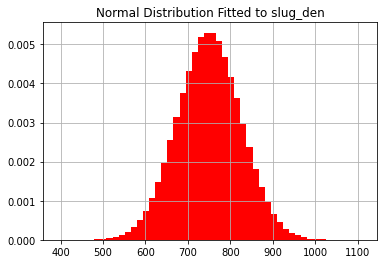

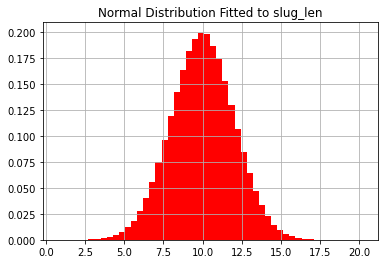

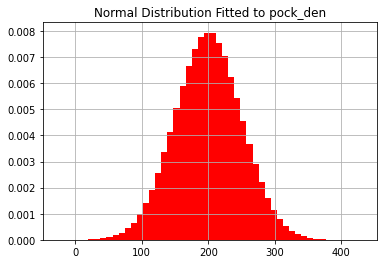

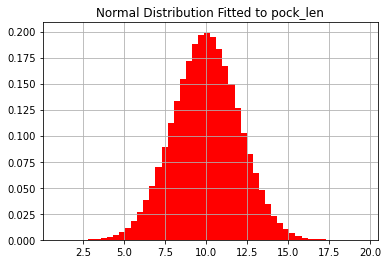

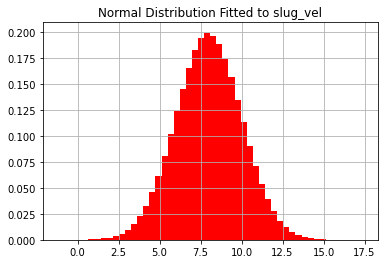

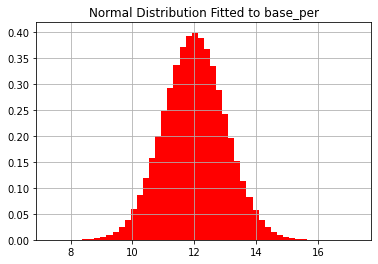

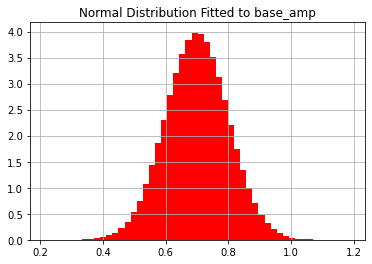

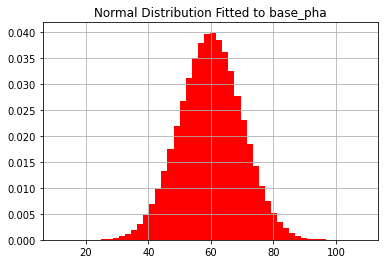

In [6]:
# Define & review a normal distributions for each param
# Need to avoid neagtive values!
for p in params:
    dist_normal = stats.norm(globals()[p].get('μ'), globals()[p].get('σ'))
    globals()[f'ndist_{p}'] = dist_normal
    
    # Verify the created normal distribution
    # rvs: Random Variates
    tdata = pd.DataFrame(dist_normal.rvs(1000000))
    tdata.hist(bins=50, density=True, color='red')
    plt.title(f'Normal Distribution Fitted to {p}')
    plt.grid(True)
    

In [7]:
# Quick check on roundings
round(ndist_slug_vel.rvs(1)[0], 1)

10.2

### Static File Creation

In [8]:
# Static file name
fn_s = 'static.keyxm'

In [9]:
# Static keyword file
key_file = [
    '$PREPROCESSOR', 
    '*PARAMETERS',
    'C Set Lengths for each straight section of the spool',
    ' L1, 8',
    ' L2, 7',
    ' L3, 10',
    ' L4, 2',
    ' L5, 3',
    ' L6, 10',
    ' L7, 8',
    ' L8, 4',
    ' L9, 10',
    ' TotLen, =[L1+L2+L3+L4+L5+L6+L7+L8+L9+(0.5*PI*R1_2)+(0.5*PI*R2_3)+(0.5*PI*R3_4)+(0.5*PI*R4_5)+(0.5*PI*R5_6)+(0.5*PI*R6_7)+(0.5*PI*R7_8)+(0.5*PI*R8_9)]',
    'C Define Radii for corners at which lines intersect',
    'C Rx_y corresponds to the radius between section x and y',
    ' R1_2, =[3*Do]',
    ' R2_3, =[3*Do]',
    ' R3_4, =[2*Do]',
    ' R4_5, =[2*Do]',
    ' R5_6, =[3*Do]',
    ' R6_7, =[3*Do]',
    ' R7_8, =[3*Do]',
    ' R8_9, =[3*Do]',
    '',
    'C Properties of steel',
    ' E, <207GPa>',
    ' G, <80GPa>',
    ' rho, 7850',
    '',
    'C Diameters',
    ' Do, <400mm>',
    ' WT, <25mm>',
    ' Di, =[Do-2*WT]',
    '',
    'C Hydrodynamic Properties',
    ' Drag, 1.2',
    ' Inertia, 2',
    '',
    'C Ocean Parameters',
    ' WaterDepth, 1500',
    ' rhoWater, 1025',
    ' grav, 9.81',
    '',
    'C Fluid Parameters',
    ' rhoOil, 800',
    ' rhoGas, 200',
    '',
    'C Suggested element lengths',
    ' min_len, =[(0.5*PI*R1_2/10.0)]',
    ' max_len, 0.5',
    '',
    'C Guide Parameters',
    ' Kcont, 1.0E+06',
    ' Length, =[L3*0.1]',
    ' Width,  =[5*Do]',
    ' Thickness, =[1.5*Do]',
    '',
    '$MODEL',
    '*LINES',
    'C Set up straight line sections on the model',
    ' LINE=Line_1',
    ' START=Line_1_Start, =[2*Do], 0, 0',
    ' END=Line_1_End, =[2*Do], =[L1-R1_2], 0',
    ' =[min_len], =[max_len]',
    '',
    ' LINE=Line_2',
    ' START=Line_2_Start, =[2*Do], =[L1], =[-R1_2]',
    ' END=Line_2_End, =[2*Do], =[L1], =[-L2+R2_3]',
    ' =[min_len], =[max_len]',
    '',
    ' LINE=Line_3',
    ' START=Line_3_Start, =[2*Do], =[L1+R2_3], =[-L2]',
    ' END=Line_3_End, =[2*Do], =[L1+L3-R3_4], =[-L2]',
    ' =[min_len], =[max_len]',
    '',
    ' LINE=Line_4',
    ' START=Line_4_Start, =[2*Do+R3_4], =[L1+L3], =[-L2]',
    ' END=Line_4_End, =[2*Do+L4-R4_5], =[L1+L3], =[-L2]',
    ' =[min_len], =[max_len]',
    '',
    ' LINE=Line_5',
    ' START=Line_5_Start, =[2*Do+L4], =[L1+L3], =[-L2+R4_5]',
    ' END=Line_5_End, =[2*Do+L4], =[L1+L3], =[-L2+L5-R5_6]',
    ' =[min_len], =[max_len]',
    '',
    ' LINE=Line_6',
    ' START=Line_6_Start, =[2*Do+L4], =[L1+L3+R5_6], =[-L2+L5]',
    ' END=Line_6_End, =[2*Do+L4], =[L1+L3+L6-R6_7], =[-L2+L5]',
    ' =[min_len], =[max_len]',
    '',
    ' LINE=Line_7',
    ' START=Line_7_Start, =[2*Do+L4], =[L1+L3+L6], =[-L2+L5-R6_7]',
    ' END=Line_7_End, =[2*Do+L4], =[L1+L3+L6], =[-L2+L5-L7+R7_8]',
    ' =[min_len], =[max_len]',
    '',
    ' LINE=Line_8',
    ' START=Line_8_Start, =[2*Do+L4+R7_8], =[L1+L3+L6], =[-L2+L5-L7]',
    ' END=Line_8_End, =[2*Do+L4+L8-R8_9], =[L1+L3+L6], =[-L2+L5-L7]',
    ' =[min_len], =[max_len]',
    '',
    ' LINE=Line_9',
    ' START=Line_9_Start, =[2*Do+L4+L8], =[L1+L3+L6+R8_9], =[-L2+L5-L7]',
    ' END=Line_9_End, =[2*Do+L4+L8], =[L1+L3+L6+L9], =[-L2+L5-L7]',
    ' =[min_len], =[max_len]',
    '',
    '*NODE',
    'C Bend between Sections 1 and 2',
    ' 2, =[2*Do], =[L1-R1_2 + R1_2*cos(radians(90))], =[-R1_2 + R1_2*sin(radians(90))]',
    ' 3, =[2*Do], =[L1-R1_2 + R1_2*cos(radians(80))], =[-R1_2 + R1_2*sin(radians(80))]',
    ' 4, =[2*Do], =[L1-R1_2 + R1_2*cos(radians(70))], =[-R1_2 + R1_2*sin(radians(70))]',
    ' 5, =[2*Do], =[L1-R1_2 + R1_2*cos(radians(60))], =[-R1_2 + R1_2*sin(radians(60))]',
    ' 6, =[2*Do], =[L1-R1_2 + R1_2*cos(radians(50))], =[-R1_2 + R1_2*sin(radians(50))]',
    ' 7, =[2*Do], =[L1-R1_2 + R1_2*cos(radians(40))], =[-R1_2 + R1_2*sin(radians(40))]',
    ' 8, =[2*Do], =[L1-R1_2 + R1_2*cos(radians(30))], =[-R1_2 + R1_2*sin(radians(30))]',
    ' 9, =[2*Do], =[L1-R1_2 + R1_2*cos(radians(20))], =[-R1_2 + R1_2*sin(radians(20))]',
    ' 10, =[2*Do], =[L1-R1_2 + R1_2*cos(radians(10))], =[-R1_2 + R1_2*sin(radians(10))]',
    ' 11, =[2*Do], =[L1-R1_2 + R1_2*cos(radians(00))], =[-R1_2 + R1_2*sin(radians(00))]',
    'C Bend between Sections 2 and 3',
    ' 12, =[2*Do], =[L1+R2_3 + R2_3*cos(radians(180))], =[-L2+R2_3 + R2_3*sin(radians(180))]',
    ' 13, =[2*Do], =[L1+R2_3 + R2_3*cos(radians(190))], =[-L2+R2_3 + R2_3*sin(radians(190))]',
    ' 14, =[2*Do], =[L1+R2_3 + R2_3*cos(radians(200))], =[-L2+R2_3 + R2_3*sin(radians(200))]',
    ' 15, =[2*Do], =[L1+R2_3 + R2_3*cos(radians(210))], =[-L2+R2_3 + R2_3*sin(radians(210))]',
    ' 16, =[2*Do], =[L1+R2_3 + R2_3*cos(radians(220))], =[-L2+R2_3 + R2_3*sin(radians(220))]',
    ' 17, =[2*Do], =[L1+R2_3 + R2_3*cos(radians(230))], =[-L2+R2_3 + R2_3*sin(radians(230))]',
    ' 18, =[2*Do], =[L1+R2_3 + R2_3*cos(radians(240))], =[-L2+R2_3 + R2_3*sin(radians(240))]',
    ' 19, =[2*Do], =[L1+R2_3 + R2_3*cos(radians(250))], =[-L2+R2_3 + R2_3*sin(radians(250))]',
    ' 20, =[2*Do], =[L1+R2_3 + R2_3*cos(radians(260))], =[-L2+R2_3 + R2_3*sin(radians(260))]',
    ' 21, =[2*Do], =[L1+R2_3 + R2_3*cos(radians(270))], =[-L2+R2_3 + R2_3*sin(radians(270))]',
    'C Bend between Sections 3 and 4',
    ' 22, =[2*Do+R3_4-R3_4*sin(radians(90))], =[L1+L3-R3_4 - R3_4*cos(radians(90))], =[-L2]',
    ' 23, =[2*Do+R3_4-R3_4*sin(radians(100))], =[L1+L3-R3_4 - R3_4*cos(radians(100))], =[-L2]',
    ' 24, =[2*Do+R3_4-R3_4*sin(radians(110))], =[L1+L3-R3_4 - R3_4*cos(radians(110))], =[-L2]',
    ' 25, =[2*Do+R3_4-R3_4*sin(radians(120))], =[L1+L3-R3_4 - R3_4*cos(radians(120))], =[-L2]',
    ' 26, =[2*Do+R3_4-R3_4*sin(radians(130))], =[L1+L3-R3_4 - R3_4*cos(radians(130))], =[-L2]',
    ' 27, =[2*Do+R3_4-R3_4*sin(radians(140))], =[L1+L3-R3_4 - R3_4*cos(radians(140))], =[-L2]',
    ' 28, =[2*Do+R3_4-R3_4*sin(radians(150))], =[L1+L3-R3_4 - R3_4*cos(radians(150))], =[-L2]',
    ' 29, =[2*Do+R3_4-R3_4*sin(radians(160))], =[L1+L3-R3_4 - R3_4*cos(radians(160))], =[-L2]',
    ' 30, =[2*Do+R3_4-R3_4*sin(radians(170))], =[L1+L3-R3_4 - R3_4*cos(radians(170))], =[-L2]',
    ' 31, =[2*Do+R3_4-R3_4*sin(radians(180))], =[L1+L3-R3_4 - R3_4*cos(radians(180))], =[-L2]',
    'C  Bend between Sections 4 and 5',
    ' 32, =[2*Do+L4-R4_5-R4_5*sin(radians(180))], =[L1+L3], =[-L2+R4_5 + R4_5*cos(radians(180))]',
    ' 33, =[2*Do+L4-R4_5-R4_5*sin(radians(190))], =[L1+L3], =[-L2+R4_5 + R4_5*cos(radians(190))]',
    ' 34, =[2*Do+L4-R4_5-R4_5*sin(radians(200))], =[L1+L3], =[-L2+R4_5 + R4_5*cos(radians(200))]',
    ' 35, =[2*Do+L4-R4_5-R4_5*sin(radians(210))], =[L1+L3], =[-L2+R4_5 + R4_5*cos(radians(210))]',
    ' 36, =[2*Do+L4-R4_5-R4_5*sin(radians(220))], =[L1+L3], =[-L2+R4_5 + R4_5*cos(radians(220))]',
    ' 37, =[2*Do+L4-R4_5-R4_5*sin(radians(230))], =[L1+L3], =[-L2+R4_5 + R4_5*cos(radians(230))]',
    ' 38, =[2*Do+L4-R4_5-R4_5*sin(radians(240))], =[L1+L3], =[-L2+R4_5 + R4_5*cos(radians(240))]',
    ' 39, =[2*Do+L4-R4_5-R4_5*sin(radians(250))], =[L1+L3], =[-L2+R4_5 + R4_5*cos(radians(250))]',
    ' 40, =[2*Do+L4-R4_5-R4_5*sin(radians(260))], =[L1+L3], =[-L2+R4_5 + R4_5*cos(radians(260))]',
    ' 41, =[2*Do+L4-R4_5-R4_5*sin(radians(270))], =[L1+L3], =[-L2+R4_5 + R4_5*cos(radians(270))]',
    'C Bend between Sections 5 and 6',
    ' 42, =[2*Do+L4], =[L1+L3+R5_6 - R5_6*cos(radians(360))], =[-L2+L5-R5_6-R5_6*sin(radians(360))]',
    ' 43, =[2*Do+L4], =[L1+L3+R5_6 - R5_6*cos(radians(350))], =[-L2+L5-R5_6-R5_6*sin(radians(350))]',
    ' 44, =[2*Do+L4], =[L1+L3+R5_6 - R5_6*cos(radians(340))], =[-L2+L5-R5_6-R5_6*sin(radians(340))]',
    ' 45, =[2*Do+L4], =[L1+L3+R5_6 - R5_6*cos(radians(330))], =[-L2+L5-R5_6-R5_6*sin(radians(330))]',
    ' 46, =[2*Do+L4], =[L1+L3+R5_6 - R5_6*cos(radians(320))], =[-L2+L5-R5_6-R5_6*sin(radians(320))]',
    ' 47, =[2*Do+L4], =[L1+L3+R5_6 - R5_6*cos(radians(310))], =[-L2+L5-R5_6-R5_6*sin(radians(310))]',
    ' 48, =[2*Do+L4], =[L1+L3+R5_6 - R5_6*cos(radians(300))], =[-L2+L5-R5_6-R5_6*sin(radians(300))]',
    ' 49, =[2*Do+L4], =[L1+L3+R5_6 - R5_6*cos(radians(290))], =[-L2+L5-R5_6-R5_6*sin(radians(290))]',
    ' 50, =[2*Do+L4], =[L1+L3+R5_6 - R5_6*cos(radians(280))], =[-L2+L5-R5_6-R5_6*sin(radians(280))]',
    ' 51, =[2*Do+L4], =[L1+L3+R5_6 - R5_6*cos(radians(270))], =[-L2+L5-R5_6-R5_6*sin(radians(270))]',
    'C Bend between Sections 6 and 7',
    ' 52, =[2*Do+L4], =[L1+L3+L6-R6_7 - R6_7*cos(radians(270))], =[-L2+L5-R6_7-R6_7*sin(radians(270))]',
    ' 53, =[2*Do+L4], =[L1+L3+L6-R6_7 - R6_7*cos(radians(260))], =[-L2+L5-R6_7-R6_7*sin(radians(260))]',
    ' 54, =[2*Do+L4], =[L1+L3+L6-R6_7 - R6_7*cos(radians(250))], =[-L2+L5-R6_7-R6_7*sin(radians(250))]',
    ' 55, =[2*Do+L4], =[L1+L3+L6-R6_7 - R6_7*cos(radians(240))], =[-L2+L5-R6_7-R6_7*sin(radians(240))]',
    ' 56, =[2*Do+L4], =[L1+L3+L6-R6_7 - R6_7*cos(radians(230))], =[-L2+L5-R6_7-R6_7*sin(radians(230))]',
    ' 57, =[2*Do+L4], =[L1+L3+L6-R6_7 - R6_7*cos(radians(220))], =[-L2+L5-R6_7-R6_7*sin(radians(220))]',
    ' 58, =[2*Do+L4], =[L1+L3+L6-R6_7 - R6_7*cos(radians(210))], =[-L2+L5-R6_7-R6_7*sin(radians(210))]',
    ' 59, =[2*Do+L4], =[L1+L3+L6-R6_7 - R6_7*cos(radians(200))], =[-L2+L5-R6_7-R6_7*sin(radians(200))]',
    ' 60, =[2*Do+L4], =[L1+L3+L6-R6_7 - R6_7*cos(radians(190))], =[-L2+L5-R6_7-R6_7*sin(radians(190))]',
    ' 61, =[2*Do+L4], =[L1+L3+L6-R6_7 - R6_7*cos(radians(180))], =[-L2+L5-R6_7-R6_7*sin(radians(180))]',
    'C Bend between Sections 7 and 8',
    ' 62, =[2*Do+L4+R7_8 + R7_8*cos(radians(180))], =[L1+L3+L6], =[-L2+L5-L7+R7_8-R7_8*sin(radians(180))]',
    ' 63, =[2*Do+L4+R7_8 + R7_8*cos(radians(170))], =[L1+L3+L6], =[-L2+L5-L7+R7_8-R7_8*sin(radians(170))]',
    ' 64, =[2*Do+L4+R7_8 + R7_8*cos(radians(160))], =[L1+L3+L6], =[-L2+L5-L7+R7_8-R7_8*sin(radians(160))]',
    ' 65, =[2*Do+L4+R7_8 + R7_8*cos(radians(150))], =[L1+L3+L6], =[-L2+L5-L7+R7_8-R7_8*sin(radians(150))]',
    ' 66, =[2*Do+L4+R7_8 + R7_8*cos(radians(140))], =[L1+L3+L6], =[-L2+L5-L7+R7_8-R7_8*sin(radians(140))]',
    ' 67, =[2*Do+L4+R7_8 + R7_8*cos(radians(130))], =[L1+L3+L6], =[-L2+L5-L7+R7_8-R7_8*sin(radians(130))]',
    ' 68, =[2*Do+L4+R7_8 + R7_8*cos(radians(120))], =[L1+L3+L6], =[-L2+L5-L7+R7_8-R7_8*sin(radians(120))]',
    ' 69, =[2*Do+L4+R7_8 + R7_8*cos(radians(110))], =[L1+L3+L6], =[-L2+L5-L7+R7_8-R7_8*sin(radians(110))]',
    ' 70, =[2*Do+L4+R7_8 + R7_8*cos(radians(100))], =[L1+L3+L6], =[-L2+L5-L7+R7_8-R7_8*sin(radians(100))]',
    ' 71, =[2*Do+L4+R7_8 + R7_8*cos(radians(90))], =[L1+L3+L6], =[-L2+L5-L7+R7_8-R7_8*sin(radians(90))]',
    'C Bend between Sections 8 and 9',
    ' 72, =[2*Do+L4+L8-R8_9 - R8_9*cos(radians(90))], =[L1+L3+L6+R8_9-R8_9*sin(radians(90))], =[-L2+L5-L7]',
    ' 73, =[2*Do+L4+L8-R8_9 - R8_9*cos(radians(100))], =[L1+L3+L6+R8_9-R8_9*sin(radians(100))], =[-L2+L5-L7]',
    ' 74, =[2*Do+L4+L8-R8_9 - R8_9*cos(radians(110))], =[L1+L3+L6+R8_9-R8_9*sin(radians(110))], =[-L2+L5-L7]',
    ' 75, =[2*Do+L4+L8-R8_9 - R8_9*cos(radians(120))], =[L1+L3+L6+R8_9-R8_9*sin(radians(120))], =[-L2+L5-L7]',
    ' 76, =[2*Do+L4+L8-R8_9 - R8_9*cos(radians(130))], =[L1+L3+L6+R8_9-R8_9*sin(radians(130))], =[-L2+L5-L7]',
    ' 77, =[2*Do+L4+L8-R8_9 - R8_9*cos(radians(140))], =[L1+L3+L6+R8_9-R8_9*sin(radians(140))], =[-L2+L5-L7]',
    ' 78, =[2*Do+L4+L8-R8_9 - R8_9*cos(radians(150))], =[L1+L3+L6+R8_9-R8_9*sin(radians(150))], =[-L2+L5-L7]',
    ' 79, =[2*Do+L4+L8-R8_9 - R8_9*cos(radians(160))], =[L1+L3+L6+R8_9-R8_9*sin(radians(160))], =[-L2+L5-L7]',
    ' 80, =[2*Do+L4+L8-R8_9 - R8_9*cos(radians(170))], =[L1+L3+L6+R8_9-R8_9*sin(radians(170))], =[-L2+L5-L7]',
    ' 81, =[2*Do+L4+L8-R8_9 - R8_9*cos(radians(180))], =[L1+L3+L6+R8_9-R8_9*sin(radians(180))], =[-L2+L5-L7]',
    '',
    '*ELEMENT',
    'C Spool',
    ' 2, 2, 3',
    ' GEN=2, 9',
    ' 12, 12, 13',
    ' GEN=12, 9',
    ' 22, 22, 23',
    ' GEN=22, 9',
    ' 32, 32, 33',
    ' GEN=32, 9',
    ' 42, 42, 43',
    ' GEN=42, 9',
    ' 52, 52, 53',
    ' GEN=52, 9',
    ' 62, 62, 63',
    ' GEN=62, 9',
    ' 72, 72, 73',
    ' GEN=72, 9',
    '',
    '*EQUIVALENT',
    ' {Line_1_End}, 2',
    ' 11, {Line_2_Start}',
    ' {Line_2_End}, 12',
    ' 21, {Line_3_Start}',
    ' {Line_3_End}, 22',
    ' 31, {Line_4_Start}',
    ' {Line_4_End}, 32',
    ' 41, {Line_5_Start}',
    ' {Line_5_End}, 42',
    ' 51, {Line_6_Start}',
    ' {Line_6_End}, 52',
    ' 61, {Line_7_Start}',
    ' {Line_7_End}, 62',
    ' 71, {Line_8_Start}',
    ' {Line_8_End}, 72',
    ' 81, {Line_9_Start}',
    '',
    '*ELEMENT SETS',
    ' SET=Spool',
    ' GEN={Line_9_Last},{Line_9_First},-1',
    ' GEN=80, 72, -1',
    ' GEN={Line_8_Last},{Line_8_First},-1',
    ' GEN=70, 62, -1',
    ' GEN={Line_7_Last},{Line_7_First},-1',
    ' GEN=60, 52, -1',
    ' GEN={Line_6_Last},{Line_6_First},-1',
    ' GEN=50, 42, -1',
    ' GEN={Line_5_Last},{Line_5_First},-1',
    ' GEN=40, 32, -1',
    ' GEN={Line_4_Last},{Line_4_First},-1',
    ' GEN=30, 22, -1',
    ' GEN={Line_3_Last},{Line_3_First},-1',
    ' GEN=20, 12, -1',
    ' GEN={Line_2_Last},{Line_2_First},-1',
    ' GEN=10, 2, -1',
    ' GEN={Line_1_Last},{Line_1_First},-1',
    '',
    '*OCEAN',
    ' =[WaterDepth], =[rhoWater], =[grav]',
    '',
    '*GEOMETRIC SETS',
    ' OPTION=RIGID',
    ' SET=Spool',
    ' =[E], =[G], =[Do], =[Di], =[rho]',
    '',
    '*HYDRODYNAMIC SETS',
    ' SET=ALL',
    ' =[Drag], 0, =[Inertia], 0',
    '',
    '*ELASTIC SURFACE',
    ' =[Kcont], 0, 0',
    ' =[-1.0*TotLen], 0',
    ' =[ 1.5*TotLen], 0',
    '',
    '*GUIDE',
    ' TYPE=FLAT',
    ' NAME=Support_A, SET=Line_3',
    ' =[1.5*Do], =[L1+(L3*0.25)], =[-L2+(Width/2)]',
    ' 0, 1, 0, 0, 0, -1',
    ' =[Length], =[Width], , =[Thickness]',
    ' 0.0, 0.0, =[Kcont]',
    ' TYPE=FLAT',
    ' NAME=Support_B, SET=Line_3',
    ' =[1.5*Do], =[L1+(L3*0.75)], =[-L2+(Width/2)]',
    ' 0, 1, 0, 0, 0, -1',
    ' =[Length], =[Width], , =[Thickness]',
    ' 0.0, 0.0, =[Kcont]',
    '',
    '$LOAD CASE',
    '*NAME',
    ' Rigid Spool; Initial Static Analysis',
    '',
    '*ANALYSIS TYPE',
    ' TYPE=STATIC',
    '',
    '*TIME',
    ' STEP=FIXED',
    ' 0, 1',
    '',
    '*BOUNDARY',
    ' TYPE=CONSTANT',
    ' {Line_1_Start}, 1, 0.0, FIXATION=ABSOLUTE',
    ' {Line_1_Start}, 2, 0.0, FIXATION=ABSOLUTE',
    ' {Line_1_Start}, 3, 0.0, FIXATION=ABSOLUTE',
    ' {Line_1_Start}, 4, 0.0, FIXATION=ABSOLUTE',
    ' {Line_1_Start}, 5, 0.0, FIXATION=ABSOLUTE',
    ' {Line_1_Start}, 6, 0.0, FIXATION=ABSOLUTE',
    '',
    ' {Line_9_End}, 1, 0.0, FIXATION=ABSOLUTE',
    ' {Line_9_End}, 2, 0.0, FIXATION=ABSOLUTE',
    ' {Line_9_End}, 3, 0.0, FIXATION=ABSOLUTE',
    ' {Line_9_End}, 4, 0.0, FIXATION=ABSOLUTE',
    ' {Line_9_End}, 5, 0.0, FIXATION=ABSOLUTE',
    ' {Line_9_End}, 6, 0.0, FIXATION=ABSOLUTE',
    '',
    '*INTERNAL FLUID',
    ' SET=Spool',
    ' =[WaterDepth], =[rhoGas], 0, -2.0',
    ''
]

In [27]:
# Write the static keyword file
with open((f'{fo_p}{fn_s}'), 'w') as f:
    f.write('\n'.join(key_file))

### Dynamic File Creation
The dynamic keyword file will be used to run the time-domain dynamic analysis for the slug loading.  Each dynamic analysis will restart from the same static file.  Slug loading and the sinusoidal boundary condition will be applied in this file.

In [11]:
# Simple function to catch any negative values that may be predicted from normal dist
def only_pos(mod):
    val = -1
    while val < 0:
        val = round(globals()[f'ndist_{mod}'].rvs(1)[0], 2)
    return(val)

In [12]:
# Create empty lists to hold random variates for each param
loadCase = []
slugDens = []
slugLens = []
pockDens = []
pockLens = []
slugVels = []
basePers = []
baseAmps = []
basePhas = []

In [13]:
# Loop through and create load case matrix (which will be abt inputs)
lc_count = 50000
for n in range(1, (lc_count + 1), 1):
    slugDen = only_pos('slug_den')
    slugLen = only_pos('slug_len')
    pockDen = only_pos('pock_den')
    pockLen = only_pos('pock_len')
    slugVel = only_pos('slug_vel')
    basePer = only_pos('base_per')
    baseAmp = only_pos('base_amp')
    basePha = only_pos('base_pha')

    slugDens.append(slugDen)
    slugLens.append(slugLen)
    pockDens.append(pockDen)
    pockLens.append(pockLen)
    slugVels.append(slugVel)
    basePers.append(basePer)
    baseAmps.append(baseAmp)
    basePhas.append(basePha)
    
    # Use indetifiers for params in load case filename
    lc = f'{n:05d}_sd{round(slugDen)}_sl{round(slugLen)}_pd{round(pockDen)}_pl{round(pockLen)}_sv{round(slugVel)}_bp{round(basePer)}_ba{round(1000*baseAmp)}_bp{round(basePha)}.keyxm'
    loadCase.append(lc)

In [29]:
# Now convert the load case matrix to a Dataframe
data_tuples = list(zip(loadCase, slugDens, slugLens, pockDens, pockLens, slugVels, basePers, baseAmps, basePhas))
param_lists = ['slugDens', 'slugLens', 'pockDens', 'pockLens', 'slugVels', 'basePers', 'baseAmps', 'basePhas']
abt = pd.DataFrame(data_tuples, 
                   columns = ['loadCase', 'slugDen', 'slugLen', 'pockDen', 'pockLen', 'slugVel', 'basePer', 'baseAmp', 'basePha'])
abt

loadCase  slugDen  slugLen  \
0      00001_sd786_sl6_pd234_pl10_sv6_bp13_ba850_bp74...   785.67     6.47   
1      00002_sd705_sl10_pd190_pl11_sv7_bp12_ba800_bp5...   705.03    10.36   
2      00003_sd742_sl12_pd159_pl13_sv7_bp12_ba650_bp6...   741.98    11.64   
3      00004_sd732_sl9_pd168_pl10_sv10_bp11_ba670_bp6...   731.88     8.82   
4      00005_sd669_sl11_pd214_pl9_sv8_bp13_ba810_bp57...   669.21    11.46   
...                                                  ...      ...      ...   
49995  49996_sd732_sl9_pd173_pl10_sv9_bp13_ba620_bp59...   732.32     9.06   
49996  49997_sd793_sl11_pd189_pl10_sv7_bp11_ba660_bp8...   793.21    11.41   
49997  49998_sd621_sl12_pd173_pl9_sv4_bp12_ba720_bp65...   620.52    11.60   
49998  49999_sd704_sl8_pd214_pl12_sv11_bp10_ba640_bp6...   704.16     8.17   
49999  50000_sd770_sl10_pd191_pl13_sv11_bp12_ba740_bp...   770.28    10.38   

       pockDen  pockLen  slugVel  basePer  baseAmp  basePha  
0       234.16    10.06     5.77    12.55     0.85    74.10  
1       190.44    11.25     7.42    11.63     0.80    59.11  
2       159.09    12.52     7.42    11.54     0.65    65.23  
3       167.88     9.84     9.52    11.48     0.67    67.85  
4       213.87     8.56     8.18    12.86     0.81    56.68  
...        ...      ...      ...      ...      ...      ...  
49995   172.68     9.95     8.89    12.78     0.62    59.34  
49996   189.05    10.24     7.15    10.96     0.66    80.89  
49997   173.32     9.37     4.03    12.21     0.72    65.25  
49998   214.00    11.90    11.39     9.95     0.64    65.80  
49999   190.74    12.92    11.22    11.85     0.74    72.65  

[50000 rows x 9 columns]

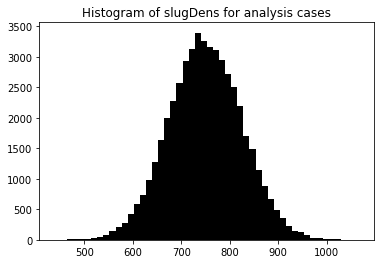

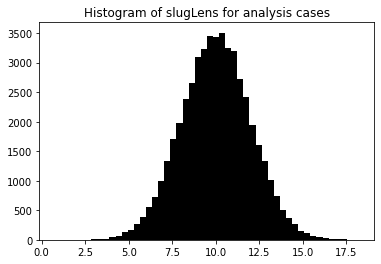

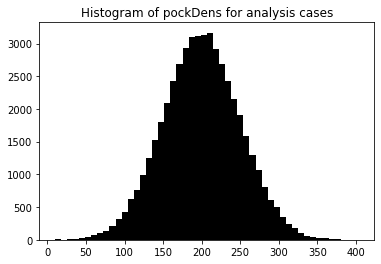

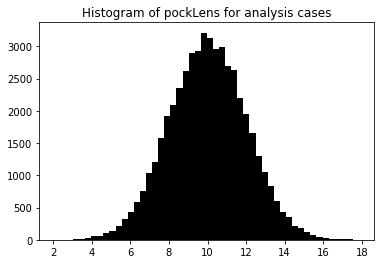

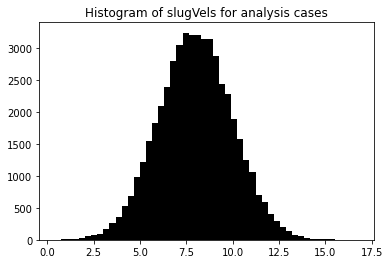

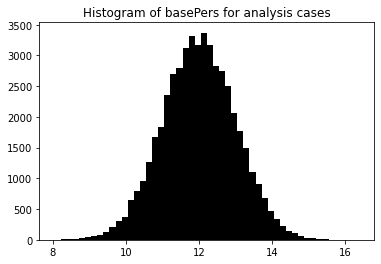

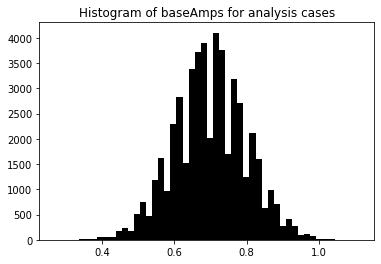

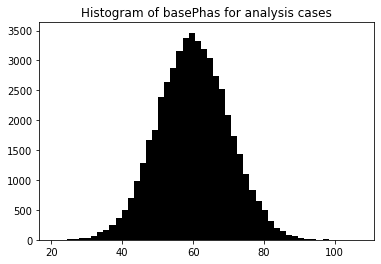

In [17]:
# Plot the load case distributions for each param (as verification)
for ppt in param_lists:
    plt.hist(globals()[ppt], bins = 50, color = 'black')
    plt.title(f'Histogram of {ppt} for analysis cases')
    plt.show()

In [26]:
# Write the load case details as a csv
abt.to_csv('220304_abt.csv', index=False)

In [18]:
# Below will be extracted using load matrix
# TODO - Add loop and remove hardcoding
#slugLen = 10
#pockLen = 10
#slugDen = 800
#pockDen = 200
#slugVel = 10
slugCou = 12
trackNode1 = 57
trackNode2 = 17

In [22]:
bs = 1000 # Bucket size (how many files to dump in each folder)
cn = 1 # File counter
bu = 1 # Bucket counter
for r in range(len(abt)):
    dyn_file = [
        '$PREPROCESSOR',
        '*PARAMETERS',
        f' slugLen, {abt.slugLen[r]}',
        f' pockLen, {abt.pockLen[r]}',
        f' slugDen, {abt.slugDen[r]}',
        f' pockDen, {abt.pockDen[r]}',
        f' slugVel, {abt.slugVel[r]}',
        f' slugCou, {slugCou}',
        '',
        '$LOAD CASE',
        '*NAME',
        f' {abt.loadCase[r]}',
        '',
        '*ANALYSIS TYPE',
        ' TYPE=DYNAMIC',
        '',
        '*RESTART',
        ' LAST="static"',
        '',
        '*SLUGS',
        ' PROPERTIES=CONSTANT',
        ' SET=Spool',
        ' =[slugLen], =[slugDen], =[-1*slugVel], 1, =[slugCou], =[slugLen/slugVel + pockLen/SlugVel], COLOUR=Red',
        ' =[pockLen], =[pockDen], =[-1*slugVel], =[1 + slugLen/slugVel], =[slugCou], =[slugLen/slugVel + pockLen/SlugVel], COLOUR=PaleVioletRed',
        '',
        '*BOUNDARY',
        ' TYPE=CONSTANT',
        ' {Line_1_Start}, 1, 0.0, FIXATION=ABSOLUTE',
        ' {Line_1_Start}, 2, 0.0, FIXATION=ABSOLUTE',
        ' {Line_1_Start}, 3, 0.0, FIXATION=ABSOLUTE',
        ' {Line_1_Start}, 4, 0.0, FIXATION=ABSOLUTE',
        ' {Line_1_Start}, 5, 0.0, FIXATION=ABSOLUTE',
        ' {Line_1_Start}, 6, 0.0, FIXATION=ABSOLUTE',
        '',
        ' {Line_9_End}, 1, 0.0, FIXATION=ABSOLUTE',
        ' {Line_9_End}, 3, 0.0, FIXATION=ABSOLUTE',
        ' {Line_9_End}, 4, 0.0, FIXATION=ABSOLUTE',
        ' {Line_9_End}, 5, 0.0, FIXATION=ABSOLUTE',
        ' {Line_9_End}, 6, 0.0, FIXATION=ABSOLUTE',
        '',
        ' TYPE=SINUSOIDAL',
        f' Line_9_End, 2, {abt.baseAmp[r]}, {abt.basePha[r]}, {abt.basePer[r]}',
        '',
        '*TIME',
        ' STEP=FIXED',
        ' =1, =[1 + slugCou*(slugLen/slugVel + pockLen/SlugVel) + (60/slugVel)], 0.1',
        '',
        '*DATABASE',
        ' TIME=SELECTED',
        ' =[1 + (60/slugVel)], 0.1',
        '',
        '*DATABASE CONTENT',
        'C 1: Motions, 4: Reactions, 9 & 10: local-x and y bending moment',
        ' INCLUDE=1, 4, 9, 10',
        ' EXCLUDE=2, 3, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20',
        '',
        '*TOLERANCE',
        ' ANALYSIS=STATIC/TIME',
        ' 0.025, 100',
        '',
        '',
        '$DATABASE POSTPROCESSING',
        '*TIMETRACE',
        ' TYPE=KINEMATIC',
        f' {trackNode1}, 1, 1.0, PARA=M, UNITS=m',
        f' TITLE=Node {trackNode1} Global-X (vert)',
        ' TYPE=KINEMATIC',
        f' {trackNode1}, 2, 1, PARA=M, UNITS=m',
        f' TITLE=Node {trackNode1} Global-Y (horiz) motion',
        ' TYPE=KINEMATIC',
        f' {trackNode1}, 3, 1, PARA=M, UNITS=m',
        f' TITLE=Node {trackNode1} Global-Z (horiz) motion',
        ' TYPE=KINEMATIC',
        f' {trackNode2}, 3, 1, PARA=M, UNITS=m',
        f' TITLE=Node {trackNode2} Global-Z (horiz) motion',
        ' TYPE=FORCE',
        ' {Line_9_Last}, 3, 8, , , UNITS=kN.m',
        ' TITLE=Bending Moment at Riser End',
        ' TYPE=CONTACT',
        ' NAME=Support_A, 4, , UNITS=kN',
        ' TITLE=Support A Reaction Force',
        ' TYPE=CONTACT',
        ' NAME=Support_B, 4, , UNITS=kN',
        ' TITLE=Support B Reaction Force'
    ]

    # Write the dynamic keyword file
    filename = f'{fo_p}bucket{bu}/{abt.loadCase[r]}'
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, "w") as f:
        f.write('\n'.join(dyn_file))
    
    # Change the subfolder if we hit the bucket size
    if cn % bs == 0:
        bu += 1
    
    # Increment the file counter
    cn += 1

In [ ]:
abt.loadCase[0]

In [28]:
# Write the static file to each bucket folder
sub_folders = [name for name in os.listdir(fo_p) if os.path.isdir(os.path.join(fo_p, name))]
for sub in sub_folders:
    with open(f'{fo_p}/{sub}/{fn_s}', 'w') as f:
        f.write('\n'.join(key_file))

### Bat File Creation

In [25]:
# Bat file name
fn_b = 'run_all.bat'

# Location of Flexcom executable (on machine that the analyses will be run from...)
fl_x = '"C:\Program Files\Wood\Flexcom\Version 8.10.4\\bin\\fl3.exe"'

sub_folders = [name for name in os.listdir(fo_p) if os.path.isdir(os.path.join(fo_p, name))]

# Write the bat file
for sub in sub_folders:
    with open(f'{fo_p}/{sub}/{fn_b}', 'w') as f:
        f.write(f'{fl_x} static.keyxm')
        f.write('\n')
        files_in_bucket = gb.glob(f'{fo_p}/{sub}/*.keyxm')
        files_in_bucket.sort()
        for r in files_in_bucket: 
            # Write each load case name with flexcom location to each row
            f.write(f'{fl_x} {ntpath.basename(r)}')
            f.write('\n')

### Postprocessing Results

In [ ]:
plot_files = gb.glob('*.mplt')

In [ ]:
print(plot_files)

In [ ]:
for file_p in plot_files:
    plot_raw = pd.read_csv(file_p, skiprows=12, delimiter='"')
    dat_dt = {'time':plot_raw.iloc[:,3].dropna(), 'value':plot_raw.iloc[:,5].dropna()}
    dat_df = pd.DataFrame(dat_dt)
    #print(dat_df)
    dat_range = dat_df.value.max() - dat_df.value.min()
    print(1000*dat_range)

In [ ]:
dat_df.value.max() - dat_df.value.min()